#### 9.03.24, &copy; [Marikov Artem](https://github.com/ScarlettTheBrave), 2024

# Лабораторна робота 3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією

__Мета:__ _закріпити на практиці використання алгоритмів регуляризації в задачах оптимізації функціонала якості засобами мови Python._

# Завдання для самостійної роботи
1. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 1. Проаналізувати результати.
2. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 2. Проаналізувати результати.
3. Побудувати бінарний лінійний-класифікатор з L1-регуляризатором згідно з розглянутим прикладом 3 для даних свого варіанту, проаналізувати результати і вивести результати бінарної класифікації на графіку. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
4. Модифікувати код, де замість L1-регуляризатора має використовуватись L2-регуляризатор. Проаналізувати отримані результати і порівняти їх з попередніми результатами.
5. Дати відповіді на контрольні запитання.
6. Відправити результати роботи у файлі lab_3_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

# Хід роботи

## Завдання 1

In [1]:
import numpy as np

# Функція для передбачення значень поліноміальної моделі
def predict_poly(x, koeff):
    res = 0
    # Обчислення значень для кожного степеня x та відповідного коефіцієнта
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    # Обчислення значення полінома за формулою
    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res

# Створення даних для x та y (змінена функція y)
x = np.arange(0, 10.1, 0.1)
y = np.exp(-x) * np.cos(x) # змінена функція

# Обрання кожної другої точки для тренувальних даних
x_train, y_train = x[::2], y[::2]

N = len(x)

# Підгонка полінома 10-го степеня до тренувальних даних
z_train = np.polyfit(x_train, y_train, 10)
print(z_train)

[-4.26298694e-08  2.57492180e-06 -6.78453788e-05  1.01857632e-03
 -9.51761913e-03  5.63689428e-02 -2.02532481e-01  3.66803213e-01
 -1.63276045e-02 -9.96931184e-01  9.99949939e-01]


## Завдання 2

[-0.68836504  0.04981852 -0.03036165 -0.01942277  0.01967291  0.02591711
 -0.00319626 -0.02600761 -0.03127309 -0.01551579  0.00301515  0.01196645
  0.01292172]


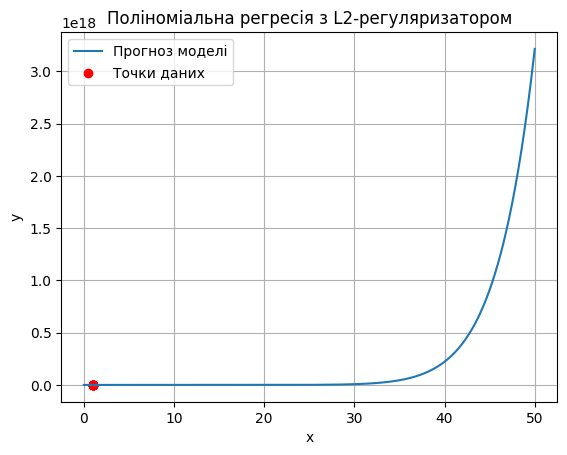

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Дані
x_train_13 = np.array([[37, 12], [48, 48], [31, 13], [27, 28], [32, 38], [41, 42], [8, 20], [13, 27], [17, 32], [19, 12]])
y_train_13 = np.array([1, -1, 1, -1, 1, -1, -1, -1, 1, -1])

# Параметри моделі
N = 13  # розмір простору ознак (степінь полінома N-1)
L = 20  # Параметр регуляризації

# Матриця вхідних векторів
x_train_13 = np.array([[a ** n for n in range(N)] for a in x_train_13[:, 0]])

# Матриця Y для вихідних даних
Y_train_13 = y_train_13

# Матриця lambda*I
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])
IL[0][0] = 0  # перший коефіцієнт не регуляризується

# Обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(x_train_13.T @ x_train_13 + IL)
w = A @ x_train_13.T @ Y_train_13
print(w)

# Відображення графіку
x_range = np.linspace(0, 50, 1000)
X_range = np.array([[a ** n for n in range(N)] for a in x_range])

yy = [np.dot(w, x) for x in X_range]
plt.plot(x_range, yy, label='Прогноз моделі')
plt.scatter(x_train_13[:, 0], y_train_13, c='r', label='Точки даних')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Поліноміальна регресія з L2-регуляризатором')
plt.legend()
plt.grid(True)
plt.show()

## Завдання 3

Вагові коефіцієнти: [ 1.01264492e-03 -4.41413063e-02 -1.36955444e-05]
Показник якості: 0.893790069284228


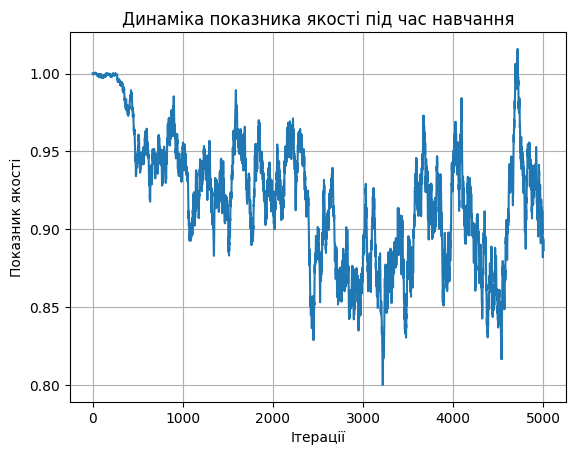

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L1 = 1.0  # Коефіцієнт L1-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Навчальна вибірка (з вашого варіанту)
x_train_13 = np.array([[37, 12], [48, 48], [31, 13], [27, 8], [32, 38], [41, 42], [8, 20], [13, 27], [17, 32], [19, 12]])
x_train_13 = np.hstack((x_train_13, np.ones((len(x_train_13), 1))))  # Додаємо стовпець константи
y_train_13 = np.array([1, -1, 1, -1, 1, -1, -1, -1, 1, -1])

fn = len(x_train_13[0])
n_train = len(x_train_13)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001            # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                # Кількість ітерацій SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_13, y_train_13)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train_13[k], y_train_13[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train_13[k], y_train_13[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_13, y_train_13)]) # Справжнє значення емпіричного ризику після навчання
print("Вагові коефіцієнти:", w)
print("Показник якості:", Q)

# Відображення графіка показника якості
plt.plot(Q_plot)
plt.grid(True)
plt.xlabel('Ітерації')
plt.ylabel('Показник якості')
plt.title('Динаміка показника якості під час навчання')
plt.show()

## Завдання 4

Вагові коефіцієнти: [ 0.01037387 -0.06095096 -0.00149913]
Показник якості: 0.8727657629287926


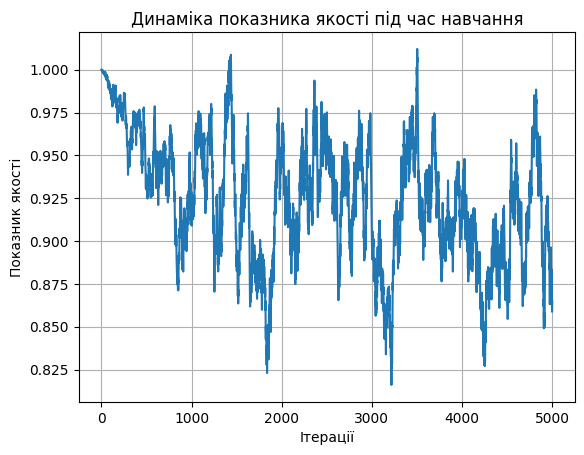

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L2 = 0.01  # Коефіцієнт L2-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + 2 * L2 * w

# Навчальна вибірка з трьома ознаками (третій - константа +1)
x_train = np.array([[37, 12], [48, 48], [31, 13], [27, 8], [32, 38], [41, 42], [8, 20], [13, 27], [17, 32], [19, 12]])
x_train = np.hstack((x_train, np.ones((len(x_train), 1))))  # Додаємо стовпець константи
y_train = np.array([1, -1, 1, -1, 1, -1, -1, -1, 1, -1])

fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001            # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                # Кількість ітерацій SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)]) # Справжнє значення емпіричного ризику після навчання
print("Вагові коефіцієнти:", w)
print("Показник якості:", Q)

# Відображення графіка показника якості
plt.plot(Q_plot)
plt.grid(True)
plt.xlabel('Ітерації')
plt.ylabel('Показник якості')
plt.title('Динаміка показника якості під час навчання')
plt.show()

<h2 align="center">Відповіді на контрольні запитання</h2>

#### 1. Що таке L2-регуляризатор, і як він використовується в задачах регресії та класифікації?

_L2-регуляризатор, також відомий як Ridge-регуляризатор, це техніка, що використовується в машинному навчанні для управління перенавчанням моделі. Він додає штраф до функції втрат для великих значень вагів, змушуючи їх наближатися до нуля. Однак, на відміну від L1-регуляризатора, L2-регуляризатор не зводить ваги до нуля повністю._

_У задачах регресії та класифікації L2-регуляризатор може допомогти зменшити перенавчання, зберігаючи при цьому всі ознаки в моделі. Це корисно, коли усі ознаки мають потенційну інформативність, але ви хочете обмежити їх вплив на модель._

#### 2.Яка основна відмінність між L1- та L2-регуляризаторами у задачах машинного навчання?

_Основна відмінність між L1 та L2 регуляризаторами полягає в тому, як вони штрафують величину коефіцієнтів моделі. L1-регуляризатор додає суму абсолютних значень коефіцієнтів, тоді як L2-регуляризатор додає суму квадратів коефіцієнтів. Це призводить до інших властивостей моделі: L1 може призводити до розріджених векторів ваги, тоді як L2 зазвичай породжує рівномірніші ваги з меншою амплітудою._

#### 3.Яким чином можна реалізувати простий лінійний бінарний класифікатор за допомогою стохастичного градієнтного спуску в Python?

_За допомогою стохастичного градієнтного спуску, використовуючи логістичну (сигмоїдальну) функцію втрати._

#### 4.Що таке стохастичний градієнтний спуск, і в чому полягає його використання для оптимізації функціонала якості?

_Стохастичний градієнтний спуск (SGD) - це метод оптимізації, що використовується для навчання моделей машинного навчання, особливо там, де набір даних дуже великий. Він використовує випадковий підвибірку даних для оцінки градієнта функції втрат. Стратегія спрощує обчислення градієнта та дозволяє збільшити швидкість навчання._

#### 5.Як впливає використання регуляризаторів (L1 та L2) на процес навчання моделі і на її загальну ефективність в задачах класифікації та регресії?

_Використання регуляризаторів (L1, L2) впливає на навчання моделі шляхом контролю за перенавчанням і створенням більш загальних моделей. Вони допомагають уникнути перенавчання, зменшуючи амплітуду коефіцієнтів моделі, що дозволяє покращити її загальні характеристики та здатність узагальнення до нових даних. Крім того, вони також можуть допомагати управляти ефектом розрідженості в даних та покращувати усталеність та швидкість збіжності алгоритмів оптимізації._

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b771292-09f5-4cd0-adfb-1b3b61d985cf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>